In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from IPython.display import display
import copy
import seaborn as sns
import pickle

from util import *

In [2]:
def pks_to_df(pks_file,algFE):
    pks_file = pks_file + algFE + '/'
    problem_set = [1,3,14,15,17,20]
    seeds = [1,2,3,4,5]
    data = {}

    for problem in problem_set:
        problem_data = []
        epochs = []
        means = []
        stds = []

        for seed in seeds:
            path = pks_file + f'seed{seed}_problem{problem}_.pkl'
            with open(path, 'rb') as f:
                # loaded_data: steps(100)*algs(16)*instance(3)*runs(5)
                loaded_data = pickle.load(f)
                problem_data.append(loaded_data)

        problem_data = np.array(problem_data)
        for step in range(100):
            #[5,16,3,5]
            step_data = problem_data[:,step,:,:,:]
            seed_means = step_data.mean(axis=(1, 2, 3))
            std = np.std(seed_means)
            # 最终结果取反
            mean = np.mean(-seed_means)
            epochs.append(step * 16)
            means.append(mean)
            stds.append(std)

        data.update({f'Means_{problem}': means, f'Vars_{problem}': stds})
        
    data.update({'Epoch': epochs})
    df = pd.DataFrame(data)
    #display(df)
    return df

In [3]:
# load defaula 5000FE data
train_in_one_data = read_data_for_transformer('datas/txts/train_in_one_seed1_5.txt')
sperately_data = read_data_for_transformer('datas/txts/spearately_for_train_in_one_problem_seed1_5.txt')
sperately_data_for_not_in_train_in_one = read_data_for_transformer('datas/txts/spearately_for_not_in_train_in_one.txt')
# draw sperate not in continual
j=0 # begin from 1, jump problem1
problem_set = [2,11,18,19,22,23]
ground_truth = [-100,-100,-5,-220,-100,0]
problem_set = [3,4,5,6,7,8,9,10,12,13,14,15,16,17,20,21]
problem_num = len(problem_set)
data = {}
for problem in problem_set:

    print(f'problem{problem}')

    epochs = []
    means = []
    stds = []
    means2 = []
    stds2 = []

    for i in range(100):
        piece = []
        piece.append(sperately_data_for_not_in_train_in_one[j*100 + i][2])
        piece.append(sperately_data_for_not_in_train_in_one[problem_num*100+ j*100 + i][2])
        piece.append(sperately_data_for_not_in_train_in_one[problem_num*100*2 + j*100 + i][2])
        piece.append(sperately_data_for_not_in_train_in_one[problem_num*100*3 + j*100 + i][2])

        mean = np.mean(piece)
        var = np.std(piece)
        epochs.append(i * 16)
        means.append(-mean)
        stds.append(var)

    data.update({f'Means_{problem}': means, f'Vars_{problem}': stds})
    j = j + 1
data.update({'Epoch': epochs})
# add problem 1, problem  1 in train_in_one is same with single train 
i=0
means = []
stds = []
for i in range(100):
    piece = []
    piece.append(train_in_one_data[i][2])
    piece.append(train_in_one_data[700+ i][2])
    piece.append(train_in_one_data[1400 + i][2])
    piece.append(train_in_one_data[2100 + i][2])

    mean = np.mean(piece)
    var = np.std(piece)
    means.append(-mean)
    stds.append(var)    

problem_set.append(1)
data.update({f'Means_1': means, f'Vars_1': stds})
FE_5000 = pd.DataFrame(data)

problem3
problem4
problem5
problem6
problem7
problem8
problem9
problem10
problem12
problem13
problem14
problem15
problem16
problem17
problem20
problem21


result_pictures/diff_FE_fig3/F1.svg
result_pictures/diff_FE_fig3/F3.svg
result_pictures/diff_FE_fig3/F14.svg
result_pictures/diff_FE_fig3/F15.svg
result_pictures/diff_FE_fig3/F17.svg
result_pictures/diff_FE_fig3/F20.svg


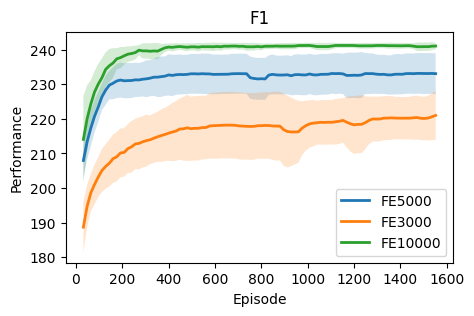

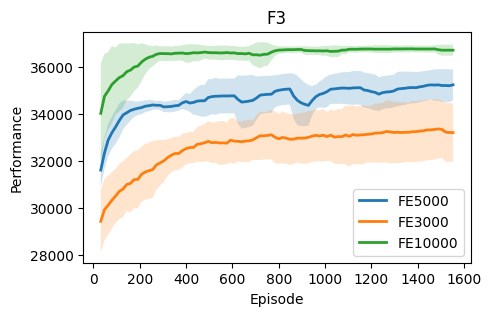

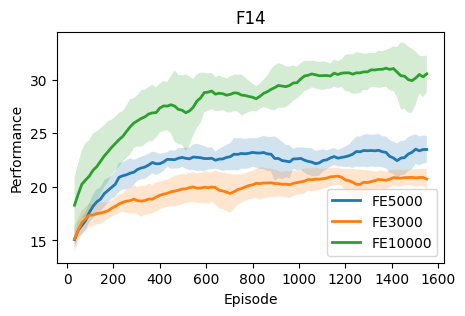

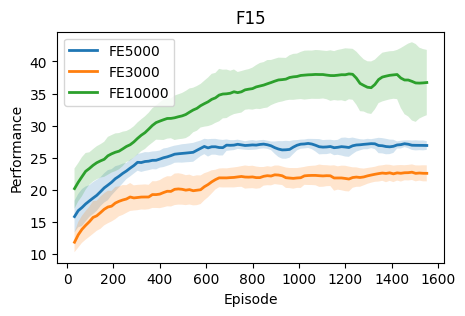

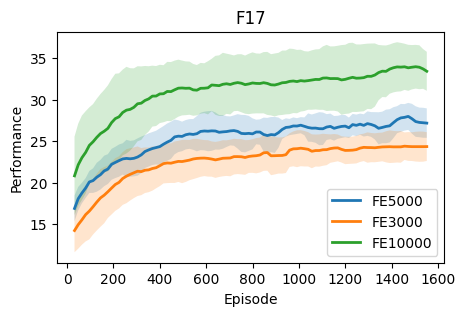

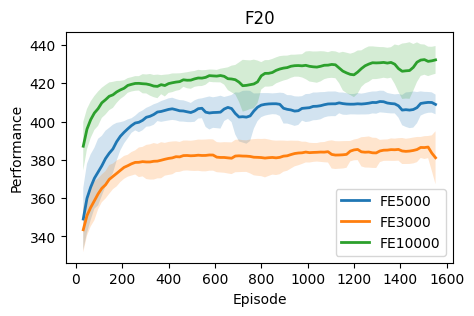

In [4]:
pks_file = './datas/pkls/'
FE_3000 = pks_to_df(pks_file,'3000FE')
FE_10000 = pks_to_df(pks_file,'10000FE')

dfs = [FE_5000, FE_3000 ,FE_10000]
display_name = ['FE5000','FE3000','FE10000']
problem_set = [1,3,14,15,17,20]
save_path = f'result_pictures/diff_FE_fig3/'

roll_and_draw_mutil(dfs,problem_set,display_name,save_path)